In [2]:
import pandas as pd

df = pd.read_csv('Dataset/Train/X_train_with_trq_margin.csv')


In [5]:
df

,trq_measured,oat,mgt,pa,ias,np,ng,trq_target,faulty,trq_margin
0,0.690790,-0.165988,0.027987,-0.925711,0.810638,-1.045463,1.280369,0.800616,0,-3.057098
1,1.473188,0.313427,2.123784,-0.312016,0.913846,0.072721,1.263805,1.447255,0,-2.115131
2,-1.466291,0.942660,-1.019912,-0.421774,0.312093,-2.094875,1.316260,-1.703897,0,-6.465562
3,1.334258,-0.106061,1.710670,-0.184317,1.130757,-0.067370,1.294173,1.334488,0,-7.052871
4,-0.696288,1.435260,-0.177547,1.352120,-1.972702,0.526307,-0.842595,-0.648782,0,-9.499112
...,...,...,...,...,...,...,...,...,...,...
598831,-0.120858,-1.484379,-0.503519,-0.503565,0.646206,-1.531962,1.244479,-0.128699,1,-11.275479
598832,-0.427967,0.643025,0.186683,1.373404,-1.682088,0.717142,-0.577635,-0.392722,1,-0.648192
598833,-0.413343,0.643025,0.199278,1.371820,-1.524653,0.536297,-0.522419,-0.450824,1,10.239773
598834,-3.159493,-0.571895,0.756841,0.577379,0.870825,0.586006,0.064906,-2.678510,1,3.016958


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Supponiamo che df sia il DataFrame contenente i dati, già preparati
y = df['faulty'].values
X = df.drop(columns=['trq_target', 'faulty'])

# Divisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista di classificatori da provare
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [4]:
X_train

,trq_measured,oat,mgt,pa,ias,np,ng,trq_margin
192115,0.983275,0.972623,1.191759,-1.035997,-1.687336,-0.373024,1.316260,0.080256
220666,1.897292,0.223537,1.448696,-0.496177,-0.875670,0.620352,0.399681,9.601690
93178,1.122206,-0.285841,0.267291,-0.206479,1.078278,0.615257,-0.105542,-4.153085
530359,-1.122620,0.283464,-1.004798,1.348074,-1.470425,0.630540,-1.292677,-4.950618
204582,0.515298,0.942660,0.365531,-0.086695,1.123760,0.653464,-0.218734,0.512488
...,...,...,...,...,...,...,...,...
110268,-0.318285,-0.285841,-1.009836,-0.078252,0.759909,0.587239,-1.309241,-1.570566
259178,-1.042187,-0.615439,-1.828506,-0.479819,-0.658759,-2.359775,1.225154,-4.354306
365838,1.868044,-3.641747,1.307632,-0.031816,1.305685,-0.620094,1.261044,-4.612870
131932,-0.822823,0.882733,-0.770532,-0.049757,-0.342139,0.599975,-1.251265,-6.588956


In [5]:
X_test

,trq_measured,oat,mgt,pa,ias,np,ng,trq_margin
32072,1.443940,-0.195951,0.803835,-0.850252,1.003059,-0.561511,1.307977,-3.564409
353171,0.522210,0.738200,1.531429,2.052640,-1.517738,0.520339,0.244462,7.698460
448003,0.829720,-1.184745,0.272329,-0.710416,-1.968971,-0.856976,1.291413,-5.617264
162527,-0.471840,0.103683,-1.176089,-1.067658,-1.094330,-1.903841,1.307977,-6.783396
299628,0.032697,0.223537,0.020430,0.395607,1.139503,0.671294,-0.572113,-5.455970
...,...,...,...,...,...,...,...,...
579892,1.136830,1.751673,1.937379,-0.399084,-1.173047,0.678935,0.573610,-8.198281
22247,0.119186,0.231972,-0.447943,-0.609955,-0.113475,0.579042,-0.806465,60.683974
142845,-0.464528,0.792842,-0.672291,-0.573219,-0.459340,0.610163,-1.281634,-14.897612
547565,-0.274412,-0.615439,-0.712595,0.747571,0.691687,0.681482,-1.016599,-13.725804


In [9]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [10]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [10]:
# Valutazione dei modelli
results = {}

for name, clf in classifiers.items():
    # Addestramento del classificatore
    clf.fit(X_train, y_train)
    
    # Predizione
    y_pred = clf.predict(X_test)
    
    # Calcolo delle metriche
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Salvo i risultati
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report
    }
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

# Se vuoi confrontare anche la validazione incrociata
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
    print(f"{name} - CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9135662280408791
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     59747
           1       0.92      0.91      0.91     60021

    accuracy                           0.91    119768
   macro avg       0.91      0.91      0.91    119768
weighted avg       0.91      0.91      0.91    119768



KeyboardInterrupt: 

## Confidence score RandomForestClassifier

In [6]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, classification_report

# Caricamento del modello salvato
with open("Model\RandoForestForClassification.pkl", "rb") as file:
    clf = pickle.load(file)
    print(type(clf))

# Predizione
probs = clf.predict_proba(X_test)  # Probabilità previste per ogni classe
y_pred = clf.predict(X_test)

# Calcolo delle metriche
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Creazione del DataFrame per le confidence scores
confidence_df = pd.DataFrame({
    "Sample": range(len(X_test)),
    "True_Label": y_test,
    "Predicted_Label": y_pred,
    "Confidence_Faulty": probs[:, 1],
    "Confidence_Fault_Free": probs[:, 0]
})

# Filtraggio dei campioni predetti come Faulty o Fault-Free
faulty_confidence = confidence_df[confidence_df["Predicted_Label"] == 1]
fault_free_confidence = confidence_df[confidence_df["Predicted_Label"] == 0]

# Inizializzo il dizionario per salvare i risultati
results = {}

# Salvo i risultati
name = "RandomForest"  # Assegna un nome al modello
results[name] = {
    "accuracy": accuracy,
    "classification_report": report
}

# Stampo i risultati
print(f"Model: {name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("="*50)

# Stampa delle confidence scores
print("Confidence scores for Faulty samples:\n", faulty_confidence)
print("Confidence scores for Fault-Free samples:\n", fault_free_confidence)


<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\R'
C:\Users\lucab\AppData\Local\Temp\ipykernel_13704\3022496996.py:6: SyntaxWarning: invalid escape sequence '\R'
  with open("Model\RandoForestForClassification.pkl", "rb") as file:


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model: RandomForest
Accuracy: 0.9989813639703427
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59747
           1       1.00      1.00      1.00     60021

    accuracy                           1.00    119768
   macro avg       1.00      1.00      1.00    119768
weighted avg       1.00      1.00      1.00    119768

Confidence scores for Faulty samples:
         Sample  True_Label  Predicted_Label  Confidence_Faulty  \
1            1           1                1               0.94   
2            2           1                1               0.99   
4            4           1                1               1.00   
6            6           1                1               1.00   
8            8           1                1               0.96   
...        ...         ...              ...                ...   
119759  119759           1                

In [7]:
confidence_df.head()

,Sample,True_Label,Predicted_Label,Confidence_Faulty,Confidence_Fault_Free
0,0,0,0,0.00,1.00
1,1,1,1,0.94,0.06
2,2,1,1,0.99,0.01
3,3,0,0,0.00,1.00
4,4,1,1,1.00,0.00


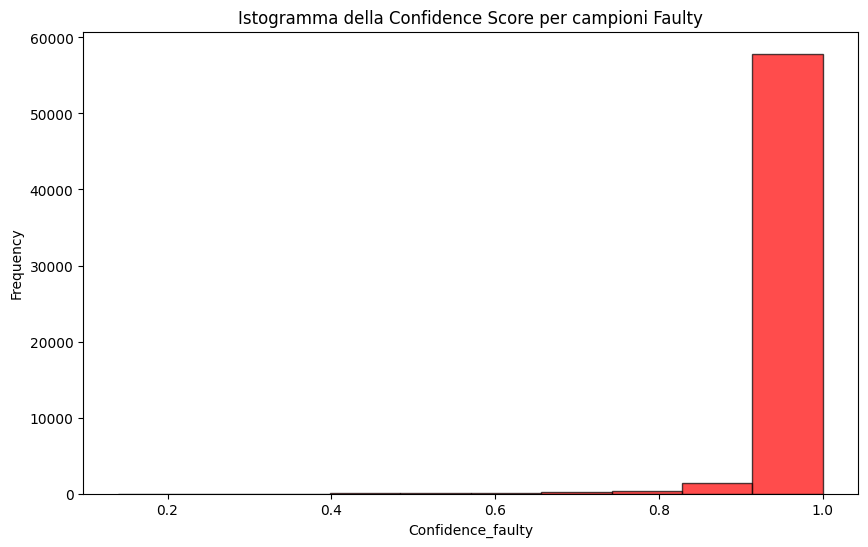

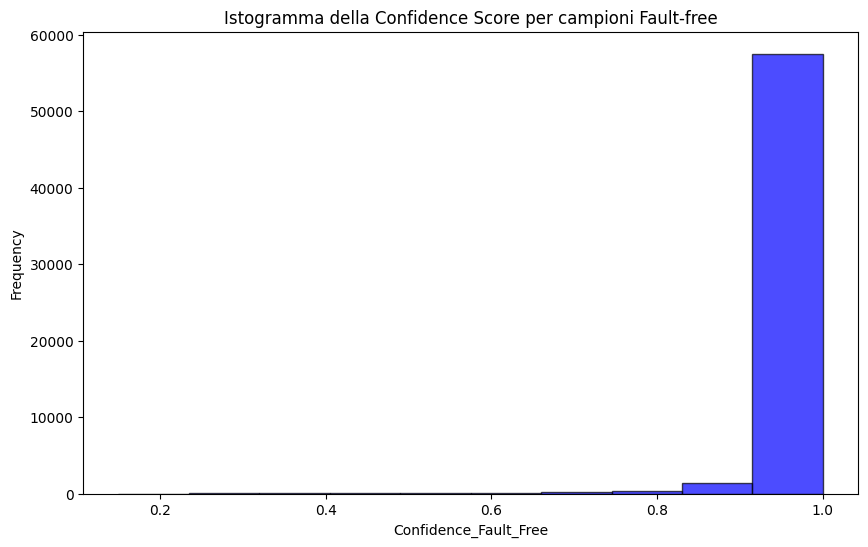

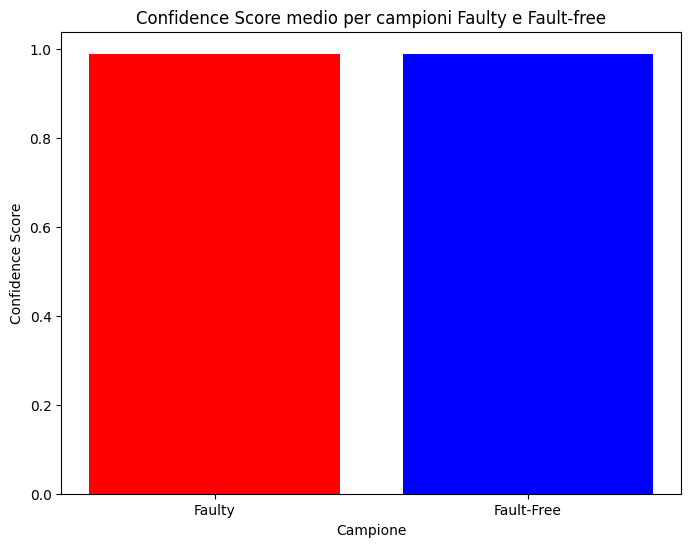

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtriamo i campioni reali faulty (True_Label == 1) e fault-free (True_Label == 0)
faulty_df = confidence_df[confidence_df['True_Label'] == 1]
fault_free_df = confidence_df[confidence_df['True_Label'] == 0]

# 1. Istogramma per campioni reali faulty (1) con Confidence_Faulty
plt.figure(figsize=(10, 6))
plt.hist(faulty_df['Confidence_Faulty'], bins=10, color='red', edgecolor='black', alpha=0.7)
plt.title('Istogramma della Confidence Score per campioni Faulty')
plt.xlabel('Confidence_faulty')
plt.ylabel('Frequency')
plt.show()

# 2. Istogramma per campioni reali fault-free (0) con Confidence_Fault_Free
plt.figure(figsize=(10, 6))
plt.hist(fault_free_df['Confidence_Fault_Free'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Istogramma della Confidence Score per campioni Fault-free')
plt.xlabel('Confidence_Fault_Free')
plt.ylabel('Frequency')
plt.show()

# 3. Grafico a istogramma delle medie delle confidence score
mean_confidence_faulty = faulty_df['Confidence_Faulty'].mean()
mean_confidence_fault_free = fault_free_df['Confidence_Fault_Free'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Faulty', 'Fault-Free'], [mean_confidence_faulty, mean_confidence_fault_free], color=['red', 'blue'])
plt.title('Confidence Score medio per campioni Faulty e Fault-free')
plt.ylabel('Confidence Score')
plt.xlabel('Campione')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import (norm, expon, uniform, gamma, beta, lognorm, chi2, weibull_min,
                         t, f, cauchy, laplace, rayleigh, pareto, gumbel_r, logistic,
                         erlang, powerlaw, nakagami, betaprime, kstest)

# Funzione per valutare le distribuzioni e selezionare la migliore
def find_best_distribution(data, distributions):
    results = []
    
    for dist_name, dist in distributions.items():
        try:
            # Stima dei parametri della distribuzione
            params = dist.fit(data)
            # Calcolo KS test
            ks_stat, ks_pvalue = kstest(data, dist.cdf, args=params)
            results.append((dist_name, ks_stat, ks_pvalue))
        except Exception:
            results.append((dist_name, np.inf, 0))  # Errore nella stima

    # Ordina i risultati per KS statistic (più basso è meglio)
    results = sorted(results, key=lambda x: x[1])
    return results


### Distribuzione confidence score per campioni faulty

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import (norm, expon, uniform, gamma, beta, lognorm, chi2, weibull_min,
                         t, f, cauchy, laplace, rayleigh, pareto, gumbel_r, logistic,
                         erlang, powerlaw, nakagami, betaprime, kstest)



if 'Confidence_Faulty' in faulty_df.columns:
    confidence_faulty = faulty_df['Confidence_Faulty'].dropna()
    
    # Distribuzioni da testare
    distributions = {
        "Normal (norm)": norm,
        "Exponential (expon)": expon,
        "Uniform (uniform)": uniform,
        "Gamma (gamma)": gamma,
        "Beta (beta)": beta,
        "Log-Normal (lognorm)": lognorm,
        "Chi-Squared (chi2)": chi2,
        "Weibull (weibull_min)": weibull_min,
        "Student’s t (t)": t,
        "F (f)": f,
        "Cauchy (cauchy)": cauchy,
        "Laplace (laplace)": laplace,
        "Rayleigh (rayleigh)": rayleigh,
        "Pareto (pareto)": pareto,
        "Gumbel (gumbel_r)": gumbel_r,
        "Logistic (logistic)": logistic,
        "Erlang (erlang)": erlang,
        "Power Law (powerlaw)": powerlaw,
        "Nakagami (nakagami)": nakagami,
        "Beta Prime (betaprime)": betaprime,
    }
    
    # Trova la migliore distribuzione
    best_fit = find_best_distribution(confidence_faulty, distributions)
    print("Distribuzioni ordinate per adattamento (KS statistic) Faulty:")
    for result in best_fit:
        print(f"{result[0]} - KS Stat: {result[1]:.4f}, p-value: {result[2]:.4f}")
else:
    print("La colonna non è presente nel dataset.")


c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:526: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025.
  fx = function(np.copy(x), *(wrapper_args + args))
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:526: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  fx

Distribuzioni ordinate per adattamento (KS statistic) Faulty:
Normal (norm) - KS Stat: 0.3903, p-value: 0.0000
Log-Normal (lognorm) - KS Stat: 0.3903, p-value: 0.0000
F (f) - KS Stat: 0.3906, p-value: 0.0000
Nakagami (nakagami) - KS Stat: 0.3906, p-value: 0.0000
Beta Prime (betaprime) - KS Stat: 0.3916, p-value: 0.0000
Gamma (gamma) - KS Stat: 0.3971, p-value: 0.0000
Logistic (logistic) - KS Stat: 0.4031, p-value: 0.0000
Student’s t (t) - KS Stat: 0.4266, p-value: 0.0000
Chi-Squared (chi2) - KS Stat: 0.4469, p-value: 0.0000
Erlang (erlang) - KS Stat: 0.4570, p-value: 0.0000
Weibull (weibull_min) - KS Stat: 0.4791, p-value: 0.0000
Cauchy (cauchy) - KS Stat: 0.5000, p-value: 0.0000
Laplace (laplace) - KS Stat: 0.5000, p-value: 0.0000
Gumbel (gumbel_r) - KS Stat: 0.5144, p-value: 0.0000
Rayleigh (rayleigh) - KS Stat: 0.5408, p-value: 0.0000
Exponential (expon) - KS Stat: 0.5653, p-value: 0.0000
Pareto (pareto) - KS Stat: 0.5653, p-value: 0.0000
Beta (beta) - KS Stat: 0.7707, p-value: 0.00

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lucab\AppData\Local\Temp\ipykernel_13704\750869083.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf, 'r-', label=f'Distribuzione Normale ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
C:\Users\lucab\AppData\Local\Temp\ipykernel_13704\750869083.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, 'r-', label=f'Distribuzione Normale ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')


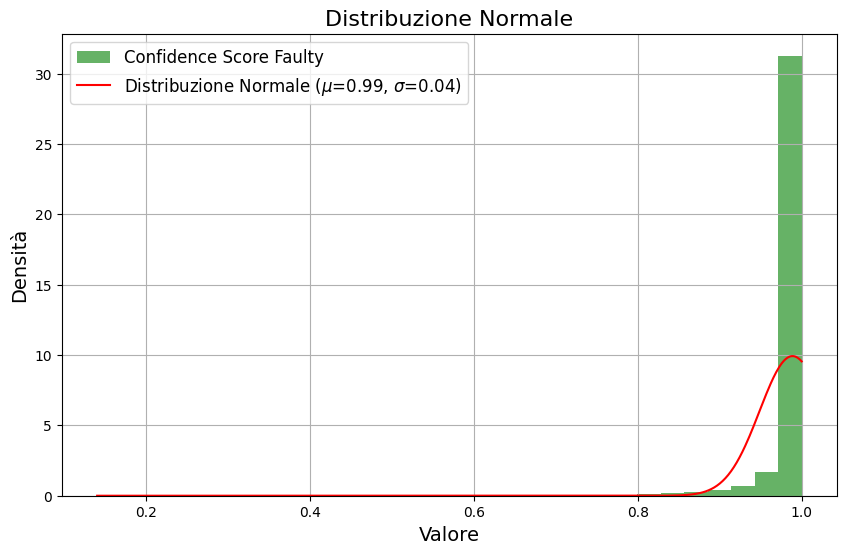

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calcolo della media e della deviazione standard dai dati esistenti
mu, sigma = confidence_faulty.mean(), confidence_faulty.std()

# Creazione dell'intervallo di valori per la distribuzione normale
x = np.linspace(confidence_faulty.min(), confidence_faulty.max(), 500)

pdf = norm.pdf(x, mu, sigma)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.hist(confidence_faulty, bins=30, density=True, alpha=0.6, color='g', label="Confidence Score Faulty")
plt.plot(x, pdf, 'r-', label=f'Distribuzione Normale ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')

# Aggiunta di etichette e titolo
plt.title("Distribuzione Normale", fontsize=16)
plt.xlabel("Valore", fontsize=14)
plt.ylabel("Densità", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


### Distribuzione confidence score per campioni fault-free

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import (norm, expon, uniform, gamma, beta, lognorm, chi2, weibull_min,
                         t, f, cauchy, laplace, rayleigh, pareto, gumbel_r, logistic,
                         erlang, powerlaw, nakagami, betaprime, kstest)



if 'Confidence_Fault_Free' in fault_free_df.columns:
    confidence_fault_free = fault_free_df['Confidence_Fault_Free'].dropna()
    
    # Distribuzioni da testare
    distributions = {
        "Normal (norm)": norm,
        "Exponential (expon)": expon,
        "Uniform (uniform)": uniform,
        "Gamma (gamma)": gamma,
        "Beta (beta)": beta,
        "Log-Normal (lognorm)": lognorm,
        "Chi-Squared (chi2)": chi2,
        "Weibull (weibull_min)": weibull_min,
        "Student’s t (t)": t,
        "F (f)": f,
        "Cauchy (cauchy)": cauchy,
        "Laplace (laplace)": laplace,
        "Rayleigh (rayleigh)": rayleigh,
        "Pareto (pareto)": pareto,
        "Gumbel (gumbel_r)": gumbel_r,
        "Logistic (logistic)": logistic,
        "Erlang (erlang)": erlang,
        "Power Law (powerlaw)": powerlaw,
        "Nakagami (nakagami)": nakagami,
        "Beta Prime (betaprime)": betaprime,
    }
    
    # Trova la migliore distribuzione
    best_fit = find_best_distribution(confidence_fault_free, distributions)
    print("Distribuzioni ordinate per adattamento (KS statistic) fault-free:")
    for result in best_fit:
        print(f"{result[0]} - KS Stat: {result[1]:.4f}, p-value: {result[2]:.4f}")
else:
    print("La colonna non è presente nel dataset.")


Distribuzioni ordinate per adattamento (KS statistic) fault-free:
Beta Prime (betaprime) - KS Stat: 0.3953, p-value: 0.0000
Normal (norm) - KS Stat: 0.3954, p-value: 0.0000
Log-Normal (lognorm) - KS Stat: 0.3954, p-value: 0.0000
Nakagami (nakagami) - KS Stat: 0.3959, p-value: 0.0000
F (f) - KS Stat: 0.4056, p-value: 0.0000
Logistic (logistic) - KS Stat: 0.4073, p-value: 0.0000
Gamma (gamma) - KS Stat: 0.4226, p-value: 0.0000
Chi-Squared (chi2) - KS Stat: 0.4381, p-value: 0.0000
Erlang (erlang) - KS Stat: 0.4444, p-value: 0.0000
Student’s t (t) - KS Stat: 0.4660, p-value: 0.0000
Weibull (weibull_min) - KS Stat: 0.4799, p-value: 0.0000
Cauchy (cauchy) - KS Stat: 0.5000, p-value: 0.0000
Laplace (laplace) - KS Stat: 0.5000, p-value: 0.0000
Gumbel (gumbel_r) - KS Stat: 0.5113, p-value: 0.0000
Rayleigh (rayleigh) - KS Stat: 0.5405, p-value: 0.0000
Exponential (expon) - KS Stat: 0.5638, p-value: 0.0000
Pareto (pareto) - KS Stat: 0.5638, p-value: 0.0000
Beta (beta) - KS Stat: 0.7744, p-value: 

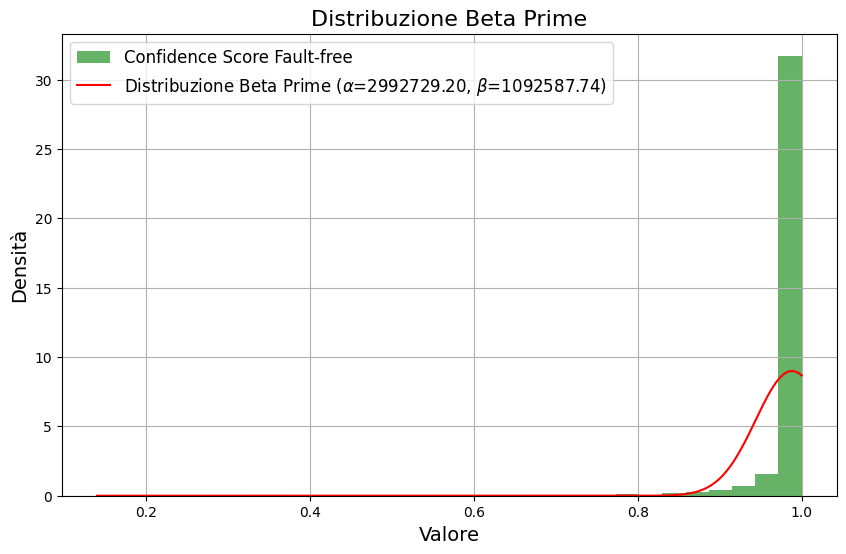

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import betaprime

# Calcolo dei parametri alpha e beta per la distribuzione Beta Prime
alpha, beta, loc, scale = betaprime.fit(confidence_fault_free)

# Creazione dell'intervallo di valori per la distribuzione
x = np.linspace(confidence_faulty.min(), confidence_faulty.max(), 500)
pdf = betaprime.pdf(x, alpha, beta, loc=loc, scale=scale)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.hist(confidence_fault_free, bins=30, density=True, alpha=0.6, color='g', label="Confidence Score Fault-free")
plt.plot(x, pdf, 'r-', label=f'Distribuzione Beta Prime ($\\alpha$={alpha:.2f}, $\\beta$={beta:.2f})')

# Aggiunta di titoli e legende
plt.title("Distribuzione Beta Prime", fontsize=16)
plt.xlabel("Valore", fontsize=14)
plt.ylabel("Densità", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()
